#Open Government Data zur Optimierung von Weiterentwicklung von Immobilienportfolien

</br>MSc Wirtschaftsinformatik - BINA Business Intelligence & Analytics</br>Modulabschlussarbeit</br></br></br>
Eingereicht am 16. Juni 2023 von
> Adrian Brügger, Consultant, Moosstrasse 79, 8038 Zürich</br>&emsp;Tel.: 078 826 45 00, Mail: adrian.bruegger@stud.hslu.ch</br></br>Stanley Ho Tak Lam, IT-Consultant, Pianostrasse 63, 2503 Biel</br>&emsp;Tel.: 077 432 62 43, Mail: stanley.lam@stud.hslu.ch</br></br>Niklas Nordström, Business Development, Werdstrasse 127, 8003 Zürich</br>&emsp;Tel.: 079 625 35 82, Mail: niklas.nordstroem@stud.hslu.ch

</br>Die Autoren erklären hiermit, dass sie die vorliegende Arbeit respektive die von ihnen ausgewiesen Leistung selbständig, ohne Mithilfe Dritter und nur unter Ausnützung der angegebenen Quellen verfasst respektive Erbracht haben.

#Zieldefinition

##Ausgangslage

Die Gruppe der Studierenden Adrian Brügger, Stanley Lam und Niklas Norström erarbeiten für den MSc Wirtschafsinformatik im Modul BINA im Frühlingssemester 2023 ein Jupyther Notebook mit dem Ziel auf der Basis einer Datenanalyse eine Entscheidung für das Data Driven Decision Making zu empfehlen.

Ein kleiner Immobilieninvestor (hypothetisch) möchte im Zuge seiner Nachhaltigkeitsstrategie in Immobilien investieren, welche verdichtet gebaut werden. Er wird für diese Strategie die entsprechenden Gelder für den Kauf der Grundstücke und den Bau der Immobilien selber sprechen.

Um besser entscheiden zu können in welchen Gemeinden der Immobilieninvestor Bauland kaufen soll, ist sein Wunsch nach einer Auswertung von bestehenden Daten um so feststellen zu können in welchen Gemeinden ein grösseres Potential vorhandne ist, verdichtete Bauten zu errichten. Diese Entscheide möchte er mittels Data Driven Decision Making treffen.

Er als Immobilieninvestor hat ein paar Wünsche / Richtlinien, welche bei der Empfehlung berücksichtigt werden sollen:
- Die Investitionen werden aufgrund des kleineren Investitionsvolumens hauptsächlich im Bereich der Deutschschweiz gemacht, um so keine zusätzliche Aufwände aufgrund der Sprachbarriere in Kauf nehmen zu müssen.
- Vorzugsweise ist das Einzugsgebiet der Kanton Zürich, es sind aber sämtliche deutschsprechenden Kantone eine valable Option.

#Datenbeschaffung

##Vorbereitung

In diesem ersten Schritt werden die Bibliotheken geladen, welche in der nachfolgenden Arbeit für die Darstellung der berechneten Daten verwendet werden.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile

##Rohdaten einlesen

Das Bundesamt für Statistik der Schweizerischen Eidgenossenschaft erhebt viele Daten im Zusammenhang mit der Bevölkerung und dem Wohnungswesen. In unserem Anwendungsfall geht es darum, dass die Geschäftsleitung verdichtet bauen möchte. In diesem Zusammenhang besteht der Wunsch, dass aufgezeigt wird, in welchen grösseren Städten der Schweiz aktuell eine geringe Verdichtung vorhanden ist und sich somit eine Investition lohnen könnte.

Dafür wird auf einen Datensatz des BfS zurückgegriffen, welcher sich "Regionalportrait" nennt und viele interessante Daten für den oben erwähnten Zweck beinhaltet. (Quelle: https://www.bfs.admin.ch/bfs/de/home/statistiken/regionalstatistik/regionale-portraets-kennzahlen/gemeinden/daten-erlaeuterungen.assetdetail.15864450.html)

Für die Auswertung muss auf Daten zurückgegriffen werden, welche den Stand 2021 haben. Die Aktualisierung der Daten wurde im Jahr 2022 ausgesetzt, da die Einführung eines neuen Regionalportraits ab Sommer 2023 einzuführen. Zum aktuellen Zeitpunkt sind diese Daten noch nicht vorhanden. Für den gewünschten Einsatzzweck sind die Daten aus dem Jahr 2021 jedoch ausreichend. Auf dieser Basis werden dann geeignete Gemeinden für eine Investition eruiert und die Vorabklärungen dazu in Angriff genommen. (Quelle: https://www.bfs.admin.ch/bfs/de/home/statistiken/regionalstatistik/regionale-portraets-kennzahlen/gemeinden/daten-erlaeuterungen.html)

Das vorliegende Skript ist generisch aufgebaut, sodass die neuen Daten - sobald sie verfügbar sind - eingelesen werden können und die Investitionsideen nochmals überprüft werden können.

In [22]:
source_regionalportrait_link = 'https://dam-api.bfs.admin.ch/hub/api/dam/assets/16484444/master'

df = pd.read_csv(source_regionalportrait_link, header=0, sep=';', dtype={'PERIOD_REF': 'str', 'PERIOD_COMP': 'str', 'CODE_REGION': 'str', 'REGION': 'str', 'INDICATORS': 'str', 'UNIT_MES': 'str', 'VALUE': 'float64', 'STATUS': 'str'})

Da in diesem File keine Angaben zu den Kantonen zu finden sind, muss diese Information noch zusätzlich angezogen werden. Diese Daten werden ebenfalls von der schweizerischen Eidgenossenschaft zur Verfügung gestellt und sind im Ortschaftenverzeichnis abgelegt. Dort sind auch Angaben wie PLZ und Koordinaten hinterlegt. Diese Informationen sind via Website von Swisstopo abrufbar (Quelle: https://data.geo.admin.ch/ch.swisstopo-vd.ortschaftenverzeichnis_plz/ortschaftenverzeichnis_plz/ortschaftenverzeichnis_plz_4326.csv.zip').

In [23]:
source_ortschaftenverzeichnis_zip_link = 'https://data.geo.admin.ch/ch.swisstopo-vd.ortschaftenverzeichnis_plz/ortschaftenverzeichnis_plz/ortschaftenverzeichnis_plz_4326.csv.zip'

df_ortschaftenverzeichnis = pd.read_csv(source_ortschaftenverzeichnis_zip_link, compression='zip', header=0, sep=';', dtype={'Ortschaftsname': 'str', 'PLZ': 'str', 'Zusatzziffer': 'str', 'Gemeindename': 'str', 'BFS-Nr': 'str', 'Kantonskürzel': 'str', 'E': 'float64', 'N': 'float64', 'Sprache': 'str'})

print(df_ortschaftenverzeichnis)

          Ortschaftsname   PLZ Zusatzziffer        Gemeindename BFS-Nr  \
0        Aeugst am Albis  8914            0     Aeugst am Albis      1   
1            Aeugstertal  8914            2     Aeugst am Albis      1   
2              Zwillikon  8909            0  Affoltern am Albis      2   
3     Affoltern am Albis  8910            0  Affoltern am Albis      2   
4             Bonstetten  8906            0          Bonstetten      3   
...                  ...   ...          ...                 ...    ...   
5658          Schaanwald  9486            0              Mauren   7008   
5659           Mauren FL  9493            0              Mauren   7008   
5660     Gamprin-Bendern  9487            0             Gamprin   7009   
5661             Ruggell  9491            0             Ruggell   7010   
5662        Schellenberg  9488            0        Schellenberg   7011   

     Kantonskürzel         E          N Sprache  
0               ZH  8.488313  47.267004      de  
1          

##Vorprüfung der Daten

In einem ersten Schritt werdne die bestehenden Daten überprüft. Zur Auswahl für die späteren Berechnungen eignen sich die Indikatoren "Einwohner", "Fläche", "Siedlungsfläche" und die "Leerwohnungsziffer".

Die Daten zur "Bevölkerungsdichte" kann für unsere Bedürfnisse keine Anwendungfinden, da diese auf die gesamte Fläche der Gemeinde berechnet ist. Für die aktuell vorliegende Anwendung ist die Bevölkerungsdichte nur innerhalb der Siedlungsfläche relevant. Die Agrar- und Forstflächen, etc. dürfen für den Anwendungsfall des verdichteten Bauens keine Anwendung finden, da diese nicht für den Wohnungsbau freigegeben sind. Eine Umzonung dieser Flächen ist sehr aufwändig bis unmöglich, weshalb in diesem Anwendungsfall der Fokus auf den Siedlungsflächen liegt.

Im folgenden Code werden die Datensätze verifiziert. Es wird geprüft, ob sämtliche verwendeten Daten im selben Datentyp/-format daher kommen.

In [24]:
## Ind_01_01 = Bevölkerung - Einwohner
## Ind_01_03 = Bevölkerung - Bevölkerungsdichte --> nicht verwendbar, da auf gesamte Fläche berechnet (Ind_01_01 / Ind_04_01)
## Ind_04_01 = Fläche - Fläche, Total in km2
## Ind_04_02 = Fläche - Siedlungsflächen (in %)
## Ind_08_01 = Bau- und Wohnungswesen - Leerwohnungsziffer (in %)

#Vorprüfungen, ob sämtliche Datensätze im selben Format vorhanden sind
print(df[ (df['UNIT_MES'] != 'UM_6')  & df['INDICATORS'].isin(['Ind_01_01']) ]) #Bevölkerung nicht in Personen --> i.O.
print(df[ (df['UNIT_MES'] != 'UM_11') & df['INDICATORS'].isin(['Ind_04_01']) ]) #Fläche Total nicht in km2 --> i.O.
print(df[ (df['UNIT_MES'] != 'UM_2')  & df['INDICATORS'].isin(['Ind_04_02']) ]) #Siedlungsfläche nicht in % --> i.O.
print(df[ (df['UNIT_MES'] != 'UM_2')  & df['INDICATORS'].isin(['Ind_08_01']) ]) #Leerwohnungsziffer nicht in % --> i.O.

Empty DataFrame
Columns: [PERIOD_REF, PERIOD_COMP, CODE_REGION, REGION, INDICATORS, UNIT_MES, VALUE, STATUS]
Index: []
Empty DataFrame
Columns: [PERIOD_REF, PERIOD_COMP, CODE_REGION, REGION, INDICATORS, UNIT_MES, VALUE, STATUS]
Index: []
Empty DataFrame
Columns: [PERIOD_REF, PERIOD_COMP, CODE_REGION, REGION, INDICATORS, UNIT_MES, VALUE, STATUS]
Index: []
Empty DataFrame
Columns: [PERIOD_REF, PERIOD_COMP, CODE_REGION, REGION, INDICATORS, UNIT_MES, VALUE, STATUS]
Index: []


Als Resultat werden vier leere DataFrames ausgegeben, weshalb die Datenstruktur sauber ist und alle Datensätze zu den jeweiligen Kennzahlen im korrekten Format vorhanden sind.

##Transformation der Daten

Die Datenstruktur ist so aufgebaut, dass pro Gemeinde und pro Kennzahl separate Datensätze vorhanden sind. Somit sind die Gemeinden mehrfach aufgeführt und es ergeben sich durch die Multiplikation der 2173 "Ortschaften" (2172 Gemeinden plus die Werte für die gesamte CH) mit den 41 unterschiedlichen "Indicators" / Kennzahlen. Insgesamt sind somit 89'093 Datensätze vorhanden.

In [25]:
#gesamte Anzahl Datensätze
print('Anzahl Datensätze: ' +  str(len(df)))

#eindeutige Werte der Regionen
print('Anzahl Regionen: ' +  str(len(np.unique(df['REGION']))))

#eindeutige Werte der Kennzahlen / Indicators
print('Anzahl Regionen: ' +  str(len(np.unique(df['INDICATORS']))))

Anzahl Datensätze: 89093
Anzahl Regionen: 2173
Anzahl Regionen: 41


Das Ziel der Geschäftsleitung ist, eine Aussage pro Gemeinde machen zu können, weshalb die Daten umgewandelt werden müssen. Pro relevantem Indikator / pro relevanter Kennzahl werden nun unterschiedliche Data Frames zwischengespeichert.

Für die Auswerung relevant sind die folgenden Kennzahlen:
- Ind_01_01 = Bevölkerung - Einwohner
- Ind_04_01 = Fläche - Fläche, Total
- Ind_04_02 = Fläche - Siedlungsflächen
- Ind_08_01 = Bau- und Wohnungswesen - Leerwohnungsziffer

Die entsprechenden Definitionen der Kennzahlen / Indicators wurden dem "Appendix"-File entnommen (Quelle: https://dam-api.bfs.admin.ch/hub/api/dam/assets/16484444/appendix).

Diese vier Kennzahlen werden in den vier neuen Data Frames df_einwohner (Anzahl Einwohner), df_fl_ges (Fläche gesamt in km2), df_fl_siedl_prz (%-Anteil Siedlungsfläche an gesamt Fläche) und df_leerwhgziff (Leerwohnungsziffer in %) zwischengespeichert.

In jedem dieser Data Frames sind nun 2173 Datensätze vorhanden, jeweils Einer pro Gemeinde. Im nächsten Schritt werden diese vier Data Frames zusammen gemerged um ein neues Data Frame "df_berechnet" zu erhalten, welches als Basis für die nachfolgenden Auswertungen dient.

Zum Schluss wird der Datensatz der Region CH gelöscht, da dieser die nachfolgenden Auswertungen verzerren würde. Somit sind nach dem Zurücksetzen der Indices nur noch 2172 Datensätze vorhanden.

In [26]:
# Grunddaten zu Gemeinden vorbereiten
df_gemeinde = df.loc[df['INDICATORS']=='Ind_01_01', ['CODE_REGION','REGION']]

# Ortschaftenverzeichnis nur auf Kantone reduzieren
df_gemeinde_kanton = df_ortschaftenverzeichnis.loc[:,['BFS-Nr', 'Kantonskürzel']]
df_gemeinde_kanton.rename(columns={'BFS-Nr':'CODE_REGION', 'Kantonskürzel':'KANTON'}, inplace=True)

# mehrfache Werte eliminieren (Grund: PLZ sind feiner gegliedert als BFS-Gemeinde-Nummern --> doppelte Werte vorhanden)
df_gemeinde_kanton = df_gemeinde_kanton.drop_duplicates()

# Grunddaten zusammenfügen
df_gemeinde = df_gemeinde.merge(df_gemeinde_kanton,on='CODE_REGION', how='left')

# Daten zu Einwohnerzahlen in separatem DF und mit sep. Spaltennamen speichern
df_einwohner = df.loc[df['INDICATORS']=='Ind_01_01', ['CODE_REGION','VALUE','PERIOD_REF']]
df_einwohner.rename(columns={'VALUE':'einw_value', 'PERIOD_REF':'einw_period_ref'}, inplace=True)

# Daten zu Fläche Total in km2 in separatem DF und mit sep. Spaltennamen speichern
df_fl_ges = df.loc[df['INDICATORS']=='Ind_04_01', ['CODE_REGION','VALUE','PERIOD_REF']]
df_fl_ges.rename(columns={'VALUE':'fl_ges_value', 'PERIOD_REF':'fl_ges_period_ref'}, inplace=True)

# Daten zu Fläche Siedlung in % in separatem DF und mit sep. Spaltennamen speichern
df_fl_siedl_prz = df.loc[df['INDICATORS']=='Ind_04_02', ['CODE_REGION','VALUE','PERIOD_REF']]
df_fl_siedl_prz.rename(columns={'VALUE':'fl_siedl_prz_value', 'PERIOD_REF':'fl_siedl_prz_period_ref'}, inplace=True)

# Daten zu Leerwohnungsziffer in separatem DF und mit sep. Spaltennamen speichern
df_leerwhgziff = df.loc[df['INDICATORS']=='Ind_08_01', ['CODE_REGION','VALUE','PERIOD_REF']]
df_leerwhgziff.rename(columns={'VALUE':'leerwhgziff_value', 'PERIOD_REF':'leerwhgziff_period_ref'}, inplace=True)

# gesamte Daten zusammenführen
df_berechnet = df_gemeinde.merge(df_einwohner,on='CODE_REGION').merge(df_fl_ges,on='CODE_REGION').merge(df_fl_siedl_prz,on='CODE_REGION').merge(df_leerwhgziff,on='CODE_REGION')

# Datensatz für die gesamte CH löschen (CODE_REGION = 'CH')
df_berechnet.drop(index=df_berechnet.index[df_berechnet['CODE_REGION']=='CH'], axis = 0, inplace = True)

# Data Frame neu Indexieren
df_berechnet.reset_index(inplace=True)

Das im vorherigen Schritt erstellte Data Frame wird nun weiter bearbeitet und es werden zusätzliche Kennzahlen ergänzt, welche für die nachfolgenden Visualisierungen benötigt werden.

Aktuell ist die Siedlungsfläche nicht in km2 verfügbar, sondern lediglich als Prozentwert der gesamten Fläche. Aus diesem Grund wir im ersten Schritt eine zusätzliche Spalte den Datensätzen angehängt, welche die km2 Siedlungsfläche ("fl_siedl_value") berechnet. Dazu wird die Gesamtfläche in km2 ("fl_ges_value") mit dem Siedlungsfläche in % ("fl_siedl_prz_value") multipliziert und dann / 100 dividiert (Wert ist in % und nicht als Faktor verfügbbar).

Um die Bevölkerungsdichte in Personen/km2 zu erhalten wird die Kennzahl Anzahl Einwohner ("einw_value") durch die im vorherigen Schritt berechnete Siedlungsfläche in km2 ("fl_siedl_value") dividiert. Dieser Wert wird in der Spalte "fl_einw_pro_km2_siedl_value" gespeichert.

Nun besteht noch ein Fehler in diesem Wert, da hier nicht berücksichtigt wird, wie viele Wohnungen leer stehen. Durch Leerstände wird der Wert verzerrt, da noch verfügbare Wohnfläche vorhanden ist, welche aktuell aber nicht genutzt wird. Aus diesem Grund wird im dritten Schritt diese Bereinigung vorgenommen. Die Leerwohnungsziffer ist ebenfalls als %-Zahl in den Datensätzen abgelegt, weshalb sie zuerst umgewandelt werden muss. Es wird der Gegenwert berechnet (100 - Leerwohnungsziffer "leerwhgziff_value"), um den Anteil der vermieteten Wohnungen zu errechnen. Dieser Wert wird durch 100 dividiert, um einen Faktor zu erhalten. Wenn man die Anzahl Einwohner ("einw_value") durch diesen Faktor dividiert und dann durch die Siedlungsfläche in km2 ("fl_siedl_value") dividiert, erhält man den bereinigten Einwohner/km2 Siedlungsfläche ("fl_einw_pro_km2_siedl_bereinigt_value").

Zur Validierung werden die Datensätze ausgegeben, bevor mit dem nächsten Schritt - der Visualisierung - begonnen wird.

In [27]:
# Daten Fläche Siedlung in km2 berechnen und speichern
df_berechnet['fl_siedl_value'] = df_berechnet['fl_ges_value'] * df_berechnet['fl_siedl_prz_value'] / 100

# Daten Einwohner pro km2 Siedlungsfläche berechnen und speichern
df_berechnet['fl_einw_pro_km2_siedl_value'] = df_berechnet['einw_value'] / df_berechnet['fl_siedl_value']

# Daten Einwohner pro km2 Siedlungsfläche bereinigt nach Leerstandsquote berechnen und speichern
df_berechnet['fl_einw_pro_km2_siedl_bereinigt_value'] = (df_berechnet['einw_value'] / ((100 - df_berechnet['leerwhgziff_value']) / 100)) / df_berechnet['fl_siedl_value']

# Ausgabe der Datensätze zur Kontrolle
print(df_berechnet)

      index CODE_REGION              REGION KANTON  einw_value  \
0         1           1     Aeugst am Albis     ZH      1981.0   
1         2           2  Affoltern am Albis     ZH     12303.0   
2         3           3          Bonstetten     ZH      5572.0   
3         4           4     Hausen am Albis     ZH      3751.0   
4         5           5            Hedingen     ZH      3778.0   
...     ...         ...                 ...    ...         ...   
2167   2168        6806        Vendlincourt     JU       559.0   
2168   2169        6807       Basse-Allaine     JU      1238.0   
2169   2170        6808       Clos du Doubs     JU      1263.0   
2170   2171        6809         Haute-Ajoie     JU      1085.0   
2171   2172        6810          La Baroche     JU      1142.0   

     einw_period_ref  fl_ges_value fl_ges_period_ref  fl_siedl_prz_value  \
0               2019          7.91              2016           12.658228   
1               2019         10.59              2016   

Bei der Ausgabe der ersten und letzten Datensätze sind keine Auffälligkeiten ersichtlich. Auch die Anzahl der Datensätze mit 2'172 stimmt immer noch mit der ersten Analyse überein und repräsentieren alle Ortschaften in der Schweiz.

#Überblick über Ortschaften der ganzen Schweiz

Das Ziel für den kleinen Immobilieninvestor eine Entscheidungsgrundlage für das DDDM zu erhalten soll erreicht werden, indem die Leerstands-bereinigte Einwohnerdichte auf unterschiedliche Varianten visualisiert wird.

##Analyse

Um einen groben Überblick über die Kennzahlen und deren Verteilung zu erhalten werden mit Hilfe der describe-Funktionalität die wichtigsten Eckdaten zu den Werteverteilungen ausgegeben.

In [28]:
# Datensätze Beschreiben und Quartile ausgeben
print(df_berechnet.describe())

             index     einw_value  fl_ges_value  fl_siedl_prz_value  \
count  2172.000000    2172.000000    2172.00000         2172.000000   
mean   1086.500000    3962.261971      18.40994           14.923793   
std     627.146713   12875.284703      33.45124           14.777080   
min       1.000000      32.000000       0.31000            0.138897   
25%     543.750000     720.250000       4.38000            5.763295   
50%    1086.500000    1555.500000       8.25500            9.959179   
75%    1629.250000    3834.250000      16.77750           18.914787   
max    2172.000000  420217.000000     438.63000           97.260274   

       leerwhgziff_value  fl_siedl_value  fl_einw_pro_km2_siedl_value  \
count        2172.000000     2172.000000                  2172.000000   
mean            1.963250        1.417186                  2126.980391   
std             1.694718        2.053741                  1171.114719   
min             0.000000        0.020000                   141.40852

Diese Auswertung zeigt auf, dass der Median der Einwohnerzahlen bei 1555 Personen liegt und der Median der Leerstands-bereinigten Einwohnerdichte bei 1963 Personen /  km2 Siedlungsfläche liegt.

Um einen Referenzwert von bekannten Regionen zu erhalten, werden die Werte der fünf bekanntesten Städte in der CH ausgegeben:

In [29]:
# Ausgabe der Werte für die bekanntesten Städte der CH
print(df_berechnet[df_berechnet['REGION'].isin(['Luzern', 'Zürich', 'Genève', 'Bern', 'Basel'])])

      index CODE_REGION  REGION KANTON  einw_value einw_period_ref  \
154     155         261  Zürich     ZH    420217.0            2019   
193     194         351    Bern     BE    134591.0            2019   
531     532        1061  Luzern     LU     82257.0            2019   
897     898        2701   Basel     BS    173232.0            2019   
2094   2095        6621  Genève     GE    203951.0            2019   

      fl_ges_value fl_ges_period_ref  fl_siedl_prz_value  \
154          87.93              2016           61.972472   
193          51.62              2016           45.030033   
531          29.10              2016           47.815617   
897          23.85              2016           86.521557   
2094         15.92              2016           92.133417   

     fl_siedl_prz_period_ref  leerwhgziff_value leerwhgziff_period_ref  \
154                2004/2009           0.148757                   2020   
193                2004/2009           0.564085                   2020

Genf hat mit abstand die höchste Einwohnerdichte mit fast 14'000 Einwohner pro km2. Auf Genf folgen Basel mit knapp 8'500 und Zürich mit 7'700 Einwohner / km2. Am Luftigsten lebt es sich in den Städten Bern und Luzern, welche eine Einwohnerdichte von knapp 6'000 Personen / km2 haben.

##Visualisierung

Nun werden sämtliche Ortschaften der gesamten Schweiz in einem Histogramm aufgezeigt, welches in 50 verschiedene Boxen aufgeteilt wird.

Die untere Grafik zeigt die Dichteverteilung mit drei Kurven auf. Einerseits die blaue Kurve über die gesamte Schweiz und die nachfolgenden Kurven aufgeteilt in Städe über und unter 20'000 Einwohnern.

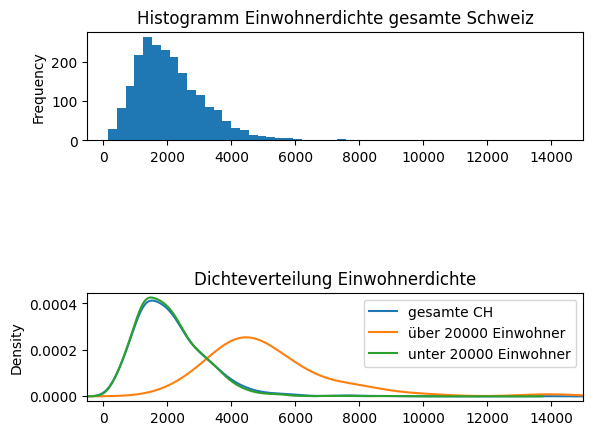

In [30]:
# zwei DataFrames "Orte mit X Einwohner" erstellen
anz_einw = 20000
df_ue_einw = df_berechnet.loc[df_berechnet.einw_value >= anz_einw]
df_u_einw = df_berechnet.loc[df_berechnet.einw_value < anz_einw]

# Plot 1 erstellen
plt.subplot2grid((3,1),(0,0)).set_xlim(-500, 15000)
#Verteilung der Einwohnerdichten in einem Histogramm aufgeteilt auf 50 Blöcke
df_berechnet['fl_einw_pro_km2_siedl_value'].plot(bins=50, kind='hist')
plt.title("Histogramm Einwohnerdichte gesamte Schweiz")

# Plot 2 erstellen
plt.subplot2grid((3,1),(2,0)).set_xlim(-500, 15000)
# Plot-Line 1: Verteilung der Einwohnerdichten CH erstellen
df_berechnet.fl_einw_pro_km2_siedl_value.plot(kind='kde')
# Plot-Line 2: Verteilung der Einwohnerdichten "Orte >= X Einwohner" erstellen
df_ue_einw.fl_einw_pro_km2_siedl_value.plot(kind='kde')
# Plot-Line 3: Verteilung der Einwohnerdichten "Orte < X Einwohner" erstellen
df_u_einw.fl_einw_pro_km2_siedl_value.plot(kind='kde')
# Titel
plt.title("Dichteverteilung Einwohnerdichte")
# Legende einfügen
plt.legend(('gesamte CH', f'über {anz_einw} Einwohner', f'unter {anz_einw} Einwohner'), loc='best')

#Top 20 Ortschaften mit der höchsten Einwohnerdichte

Im nächsten Schritt sollen die Daten geprüft werden anhand der 20 Ortschaften mit der höchsten Einwohnerdichte.

##Analyse

In [31]:
#Definition Anzahl Top-Ortschaften
anz_top_dichte = 20

#Ausgabe Orte mit den höchsten Einwohnerdichten
df_dichte_top = df_berechnet.nlargest(n=anz_top_dichte, columns='fl_einw_pro_km2_siedl_value')
print(df_dichte_top[['CODE_REGION','REGION', 'KANTON','einw_value','fl_siedl_value','leerwhgziff_value', 'fl_einw_pro_km2_siedl_bereinigt_value']])

#Anzahl Orte aus den Top20, welche weniger als 20k Einwohner haben
anz_einw = 20000

#Ausgabe
print('Anzahl Ortschaften aus Top 20 Einwohnerdichte mit > 20k Einwohner: ' + str(len(df_dichte_top.loc[df_dichte_top.einw_value > anz_einw])) + ' Stk.')
print('Anzahl Ortschaften aus Top 20 Einwohnerdichte mit < 20k Einwohner: ' + str(len(df_dichte_top.loc[df_dichte_top.einw_value < anz_einw])) + ' Stk.')

     CODE_REGION                 REGION KANTON  einw_value  fl_siedl_value  \
2094        6621                 Genève     GE    203951.0       14.667640   
2081        6608           Carouge (GE)     GE     22621.0        2.292453   
1893        5890                  Vevey     VD     19824.0        2.156962   
2104        6631                   Onex     GE     19058.0        2.180000   
1564        5196               Massagno     TI      6153.0        0.719726   
897         2701                  Basel     BS    173232.0       20.635391   
2101        6628                  Lancy     GE     33377.0        4.198388   
1575        5210               Paradiso     TI      4303.0        0.544471   
154          261                 Zürich     ZH    420217.0       54.492394   
2086        6613            Chêne-Bourg     GE      8674.0        1.127619   
1727        5586               Lausanne     VD    139408.0       18.494469   
1732        5591            Renens (VD)     VD     20886.0      

Diese Analyse zeigt auf, dass die Grenze von 20'000 Einwohnern nicht als Abstraktion für die Einwohnerdichte verwendet werden kann. In den Top 20 Ortschaften sind genau die Hälfte der Ortschaften jeweils über und unter 20'000 Einwohnern.

##Visualisierung

Text(0.5, 1.0, 'Histogramm Top20 Einwohnerdichte in Bezug zur Total Anzahl Einwohner')

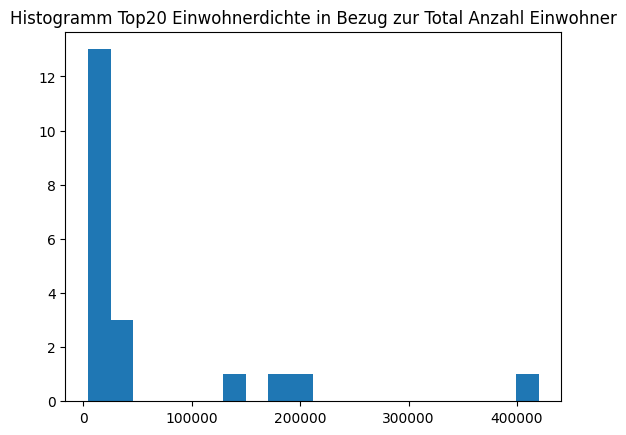

In [32]:
# Plot erstellen: Histogramm Einwohnerdichte Top 20
ax1 = plt.hist(df_dichte_top['einw_value'], bins=20)#.plot(kind='kde')
plt.title('Histogramm Top20 Einwohnerdichte in Bezug zur Total Anzahl Einwohner')

Hier wird nochmals visuell dargestellt, was im vorherigen Kapitel in den Daten ersichtlich war. Die Einwohnerdichte hat keinen Zusammenhang mit der Grösse der Ortschaft im Sinne von Anzahl Einwohner. In der Top 20 sind die Ortschaften mit wenigen Einwohnern ausgeglichen zu den grossen Städten.

Bei der obenstehenden Ausgabe der Top 20 Ortschaften ist optisch auffallend, dass sich viele Ortschaften in Westschweizer Kantonen befinden. Als nächstes werden deshalb die Kantone genauer analysiert.

#Dichteverteilung nach Kantonen

##Analyse

**80% Quantile der Einwohnerdichte über sämtliche Ortschaften der Schweiz**

Nach der Beurteilung der Top 20 der Ortschaften mit den höchsten Einwohnerdichten, wird die Analyse nun auf die Kantone fortgeführt. Zuerst wird die 80% Quantile über sämtliche Ortschaften der Schweiz ermittelt, um einen Referenzwert zu erhalten.

In [33]:
ch_80_quantile = df_berechnet.fl_einw_pro_km2_siedl_bereinigt_value.quantile(.8)

print('Die 80% Quantile der bereinigten Einwohnerdichte über sämtliche Ortschaften der Schweiz liegt bei ' + str(ch_80_quantile) + ' Einwohner/km2-Siedlungsfläche bereinigt.')

Die 80% Quantile der bereinigten Einwohnerdichte über sämtliche Ortschaften der Schweiz liegt bei 2998.345844352918 Einwohner/km2-Siedlungsfläche bereinigt.


**80% Quantile der Einwohnerdichte der einzelnen Kantone**

In einem zweiten Schritt werden dann die 80% Quantile der einzelnen Kantone ermittelt, um allfällige Unterschiede zwischen den Kantonen sichtbar zu machen.

In [34]:
#80% Quantile berechnen und Spalte korrekt beschriften
df_kanton_80_quantile = df_berechnet[['KANTON','fl_einw_pro_km2_siedl_bereinigt_value']].groupby('KANTON').quantile(0.8)
df_kanton_80_quantile.rename(columns={'fl_einw_pro_km2_siedl_bereinigt_value':'fl_einw_pro_km2_siedl_bereinigt_80_quantile'}, inplace=True)

#Rangliste in absteigender Reihenfolge sortieren
df_kanton_80_quantile = df_kanton_80_quantile.sort_values(by='fl_einw_pro_km2_siedl_bereinigt_80_quantile', ascending=False)

#Index neu setzen
df_kanton_80_quantile.reset_index(inplace=True)

#Ausgabe der ermittelten Werte
print(df_kanton_80_quantile)

   KANTON  fl_einw_pro_km2_siedl_bereinigt_80_quantile
0      BS                                  6762.143823
1      ZG                                  4518.081849
2      GE                                  4381.815750
3      ZH                                  4065.687015
4      SZ                                  3631.018765
5      AG                                  3437.214545
6      BL                                  3337.302894
7      NW                                  3302.450037
8      SG                                  3223.294271
9      LU                                  3063.192692
10     SO                                  3044.247227
11     NE                                  2916.611821
12     TI                                  2913.283697
13     AR                                  2839.388855
14     BE                                  2670.625436
15     TG                                  2667.693158
16     GL                                  2656.229336
17     VD 

Gemäss der Auswertung bestehen Unterschiede zwischen den Kantonen. Sehr eindrücklich wird hier aufgezeigt, dass diejenigen Kantone, welche viele Berggebiete haben, unten in der Rangliste zu finden sind.

**Kantonaler Anteil der Flächen, welche eine Einwohnerdichte über dem 80% Quantil der ganzen CH aufweisen**

Im nächsten Schritt wird pro Kanton berechnet wie hoch der Anteil der besiedelten Fläche ist, welche eine höhere Einwohnerdichte haben, als das 80% Quantil der gesamten Schweiz.



In [35]:
#gesamte Siedlungsfläche der Kantone summieren
df_kanton_fl_ue_80_quantile_ch = df_berechnet[['KANTON','fl_siedl_value']].groupby('KANTON').sum()

#Ergänzung Datenfeld mit Summe der Siedlungfläche derjenigen Ortschaften, welche über dem 80% Quantil der gesamten Schweiz liegen
df_kanton_fl_ue_80_quantile_ch['fl_siedl_ue_80_quantile_value'] = df_berechnet[['KANTON','fl_siedl_value']].loc[df_berechnet.fl_einw_pro_km2_siedl_bereinigt_value >= ch_80_quantile].groupby('KANTON').sum()

#Faktor der Fläche der Ortschaften >80% Quantil CH im Vergleich zur Gesamt-Siedlungsfläche pro Kanton
df_kanton_fl_ue_80_quantile_ch['fl_siedl_ue_80_quantile_percent'] = df_kanton_fl_ue_80_quantile_ch['fl_siedl_ue_80_quantile_value'] / df_kanton_fl_ue_80_quantile_ch['fl_siedl_value']

#Faktoren der Kantone ohne Ortschaften mit Einwohnerdichte > 80% Quantil der CH mit 0 füllen
df_kanton_fl_ue_80_quantile_ch = df_kanton_fl_ue_80_quantile_ch.fillna(0)

#Rangliste in absteigender Reihenfolge in Bezug auf den Faktor der Ortschaften >80% Quantil der CH
df_kanton_fl_ue_80_quantile_ch = df_kanton_fl_ue_80_quantile_ch.sort_values(by='fl_siedl_ue_80_quantile_percent', ascending=False)

#Index neu setzen
df_kanton_fl_ue_80_quantile_ch.reset_index(inplace=True)

#Ausgabe der ermittelten Werte
print(df_kanton_fl_ue_80_quantile_ch)

   KANTON  fl_siedl_value  fl_siedl_ue_80_quantile_value  \
0      BS       26.241742                      25.805878   
1      ZG       32.975067                      24.236001   
2      ZH      375.726424                     265.908218   
3      GE       94.140428                      60.657214   
4      NW       14.774785                       8.504953   
5      BL       90.228398                      47.894044   
6      AG      230.773810                     119.059114   
7      SZ       54.916425                      22.163238   
8      SG      189.772293                      75.441024   
9      SH       34.002484                      12.948419   
10     AI        5.280217                       1.950000   
11     SO      109.513042                      40.242561   
12     LU      143.848815                      52.119305   
13     AR       22.297151                       7.750517   
14     NE       66.954041                      22.363823   
15     BE      411.561374               

Diese Auswertung zeigt auf, dass es sogar Kantone (Glarus, Obwalden und Jura) gibt, in welchen keine einzige Ortschaft eine Einwohnerdichte höher als das 80% Quantil der Schweiz aufweist, welches bei knapp 3000 Einwohner pro km2 liegt.

Weit abgeschlagen an der Spitze liegt der Kanton Basel-Stadt mit über 98% der Fläche welche dichter besiedelt ist als das 80% Quantil der Schweiz. Auf dem zweiten Rang mit 73% liegt der Kanton Zug, dicht gefolgt vom Kanton Zürich mit 70%.

Nachdem die Stadt Genf mit einer fast doppelt so hohen Einwohnerdichte wie die Stadt Zürich an einsamer Spitze unterwegs war, zeigte sich beim Vergleich der Kantone Genf und Zürich ein anderes Bild. Offenbar sind die restlichen Ortschaften des Kanton Genfs einiges dünner besiedelt als die Stadt Genf, was dazu führt, dass der Kanton Genf hinter den Kanton Zürich auf dem vierten Platz landet mit 64% der Siedlungsfläche, welche über dem 80% Quantil der Schweiz liegt.

##Visualisierung

**80% Quantile der Einwohnerdichte der einzelnen Kantone**

Die im vorherigen Kapitel berechneten Einwohnerdichten werden in der folgenden Grafik visualiert.

Axes(0.125,0.11;0.775x0.77)


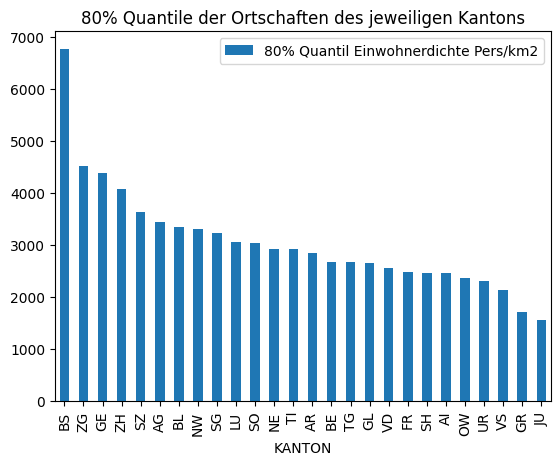

In [36]:
#Plot erstellen: 80% Quantile Einwohnerdicht der Kantone
ax1 = df_kanton_80_quantile.plot(x='KANTON', y='fl_einw_pro_km2_siedl_bereinigt_80_quantile', xticks=range(len(df_kanton_80_quantile['KANTON'])), label='80% Quantil Einwohnerdichte Pers/km2', kind='bar')
plt.title('80% Quantile der Ortschaften des jeweiligen Kantons')
ax1.set_xticklabels(df_kanton_80_quantile.KANTON)
print(ax1)

Die Visualisierung zeigt den Vorsprung des Kantons Basel-Stad im Vergleich zu den restlichen Kantonen deutlich auf. Der grössere Anteil an Ortschaften mit hoher Einwoherdichte führt dazu, dass das 80% Quantil ebenfalls sehr hoch ausfällt.

**Kantonaler Anteil der Flächen, welche eine Einwohnerdichte über dem 80% Quantil der ganzen CH aufweisen**

Wichtiger für das DDDM des Immobilieninvestors ist die Kapazität, welche noch besteht für eine verdichtete Bauweise. Diese Visualisierung hilft ihm zu sehen, welche Kantone schon bereits einen grossen Anteil der Fläche mit einer höheren Dichte als das 80% Quantil der Schweiz besiedelt haben. Diese Kantone sind somit eher zu meiden.

Axes(0.125,0.11;0.775x0.77)


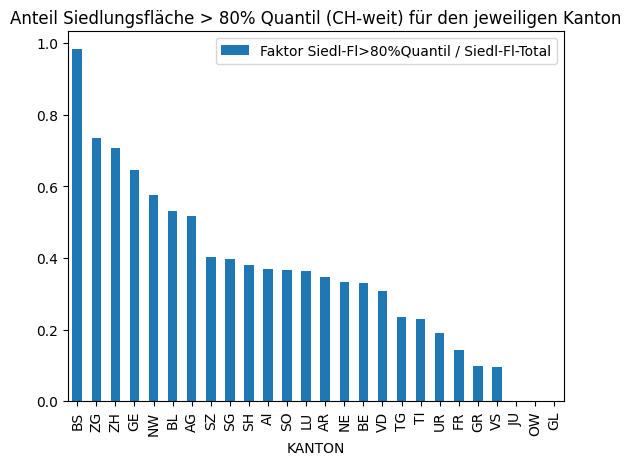

In [37]:
#Plot erstellen: Faktor der Siedlungfläche in km2, welcher dicher besiedelt ist, als das 80% Quantil der Schweiz
ax2 = df_kanton_fl_ue_80_quantile_ch.plot(x='KANTON', y='fl_siedl_ue_80_quantile_percent', xticks=range(len(df_kanton_80_quantile['KANTON'])), label='Faktor Siedl-Fl>80%Quantil / Siedl-Fl-Total', kind='bar')
plt.title('Anteil Siedlungsfläche > 80% Quantil (CH-weit) für den jeweiligen Kanton')
ax2.set_xticklabels(df_kanton_fl_ue_80_quantile_ch.KANTON)
print(ax2)

Hier wird auch nochmals deutlich aufgezeigt, dass der Kanton Basel-Stadt die Nase im schweizweiten Vergleich sehr weit vorne hat. Im Sinne des Immobilieninvestors lässt sich hier keine Empfehlung aussprechen zu investieren.

Anders sieht es hingegen in den Kantonen aus, in welchen zwischen 50 und 80% der Fläche bereits dicher als 3000 Personen / km2 besiedelt ist. Das wären die aufstrebenden Kantone, in welchen man auf den Zug aufspringen könnte. Da die Bau-Branche sehr träge ist und eine neue Immobilie nicht innerhalb von wenigen Monaten bewilligt und erstellt werden kann, ist hier vorsicht geboten. Es ist im Voraus genau abzuklären, welche Bautätigkeiten in diesen Ortschaften bereits im Bau oder in Planung sind.

Die Interessanten Kantone sind diejenigen, welche um die 40% Ihrer Fläche bereits dicht besiedelt haben. Hier besteht die Möglichkeit investieren zu können und durch die verdichtete Bauweise einen grossen Mehrwert bieten zu können.

Im Bereich von 50% - 80% sind das die Kantone Zug, Zürich, Genf, Nidwalden, Basel-Land, Aargau. Darunter im Bereich von 35% - 50% liegen die Kantone Schwyz, St. Gallen, Schaffhausen, Appenzell-Innerrhoden, Solothurn, Luzern.

#Fazit

Mit dieser Analyse ist eine erste visuelle Darstellung zur Unterstützung des Immobilieninvestors gemacht. So kann das Verständnis für die aktuelle Situation der Einwohnerdiche in den jeweiligen Regionen geschaffen werden.

Für explizite Suchaufträge und Beurteilung von Bauparzellen werden hier noch die vollständigen Listen der einzelnen Ortschaften mit den Einwohnerdichten aufbereitet.

Dieses Argument der Einwohnerdichte ist lediglich ein zusätzlicher Faktor für die Beurteilung und Bewertung von potentiellem Bauland. Es sind noch viele zusätzliche Faktoren (Lage, Aussicht, Gefälle, Infrastruktur, etc.) notwendig, um ein objektives Bild darstellen zu können. Aus diesem Grund kann an dieser Stelle keine explizite Empfehlung für eine wenige bestimmte Ortschaften ausgesprochen werden.

Gemäss den Vorgaben des Investors werden die hier ausgegebenen Ortschaften auf die deutschschweizer Kantone eingegrenzt.

In [38]:
#Vorbereitung DataFrame: nur Kantone deutschsprachig
df_de_kantone = df_berechnet[df_berechnet['KANTON'].isin(['ZH','SH','TG','SG','AR','AI','GR','OW','NW','UR','SZ','GL','VS','ZG','LU','AG','SO','BE','BL','BS'])]

#Werte der Quantile berechnen
ch_quantile = df_berechnet.fl_einw_pro_km2_siedl_bereinigt_value.quantile([0.35, 0.5, 0.8])
print('Die Quantile der Einwohnerdichte der Ortschaften liegen bei:\n0.35: ' + str(ch_quantile[(0.35)]) + '\n0.50: ' + str(ch_quantile[(0.5)]) + '\n0.80: ' + str(ch_quantile[(0.8)]))

Die Quantile der Einwohnerdichte der Ortschaften liegen bei:
0.35: 1581.8181647340741
0.50: 1963.4577568692107
0.80: 2998.345844352918


Ortschaften zwischen 0.35 und 0.50 Quantile

In [39]:
print(df_de_kantone.loc[(df_de_kantone['fl_einw_pro_km2_siedl_bereinigt_value'] > ch_quantile[(0.35)]) & (df_de_kantone['fl_einw_pro_km2_siedl_bereinigt_value'] <= ch_quantile[(0.5)])])

      index CODE_REGION           REGION KANTON  einw_value einw_period_ref  \
5         6           6  Kappel am Albis     ZH      1221.0            2019   
11       12          12       Rifferswil     ZH      1129.0            2019   
15       16          22      Benken (ZH)     ZH       845.0            2019   
16       17          23   Berg am Irchel     ZH       577.0            2019   
21       22          28           Flaach     ZH      1420.0            2019   
...     ...         ...              ...    ...         ...             ...   
2013   2014        6232          Chalais     VS      3542.0            2019   
2017   2018        6240             Lens     VS      4226.0            2019   
2021   2022        6253    Crans-Montana     VS     10365.0            2019   
2032   2033        6286           Lalden     VS       638.0            2019   
2039   2040        6293     Stalden (VS)     VS      1062.0            2019   

      fl_ges_value fl_ges_period_ref  fl_siedl_prz_

Ortschaften zwischen 0.50 und 0.80 Quantile

In [40]:
print(df_de_kantone.loc[(df_de_kantone['fl_einw_pro_km2_siedl_bereinigt_value'] > ch_quantile[(0.5)]) & (df_de_kantone['fl_einw_pro_km2_siedl_bereinigt_value'] <= ch_quantile[(0.8)])])

      index CODE_REGION           REGION KANTON  einw_value einw_period_ref  \
0         1           1  Aeugst am Albis     ZH      1981.0            2019   
3         4           4  Hausen am Albis     ZH      3751.0            2019   
4         5           5         Hedingen     ZH      3778.0            2019   
6         7           7           Knonau     ZH      2378.0            2019   
8         9           9   Mettmenstetten     ZH      5200.0            2019   
...     ...         ...              ...    ...         ...             ...   
2036   2037        6290         Saas-Fee     VS      1544.0            2019   
2037   2038        6291       Saas-Grund     VS       986.0            2019   
2041   2042        6295            Täsch     VS      1314.0            2019   
2043   2044        6297             Visp     VS      7978.0            2019   
2046   2047        6300          Zermatt     VS      5765.0            2019   

      fl_ges_value fl_ges_period_ref  fl_siedl_prz_

#Quellenverzeichnis

<ol>
<li>Bundesamt für Statistik 2021: https://www.bfs.admin.ch/bfs/de/home/statistiken/regionalstatistik/regionale-portraets-kennzahlen/gemeinden/daten-erlaeuterungen.html (abgerufen: 16.06.2023)</li>
<li>Bundesamt für Statistik 2021: https://www.bfs.admin.ch/bfs/de/home/statistiken/regionalstatistik/regionale-portraets-kennzahlen/gemeinden/daten-erlaeuterungen.assetdetail.15864450.html (abgerufen: 16.06.2023)</li>
<li>Bundesamt für Statistik 2021: https://dam-api.bfs.admin.ch/hub/api/dam/assets/16484444/appendix (abgerufen: 16.06.2023)</li>
<li>Pandas o.d.: https://pandas.pydata.org/ (abgerufen: 16.06.2023)</li>
<li>Python o.d.: https://docs.python.org/3/library/ (abgerufen: 16.06.2023)</li>
<li>Swisstopo o.d.: https://data.geo.admin.ch/ch.swisstopo-vd.ortschaftenverzeichnis_plz/ortschaftenverzeichnis_plz/ortschaftenverzeichnis_plz_4326.csv.zip' (abgerufen: 16.06.2023)</li>
</ol>